In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline


In [2]:
import tensorflow
print (tensorflow.__version__)

2.3.1


Training data shapes: X=(60000, 28, 28), y=(60000,)
Testing data shapes: X=(10000, 28, 28), y=(10000,)


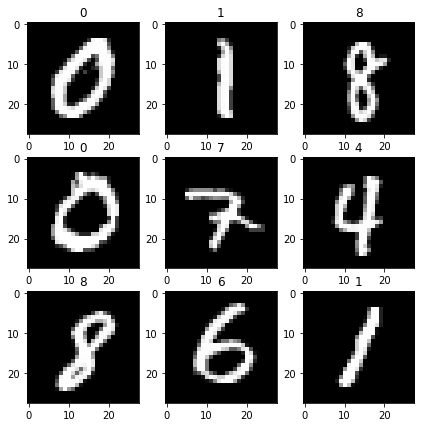

In [3]:
from tensorflow.keras.datasets import mnist

(trainX, trainY), (testX, testY) = mnist.load_data()

print('Training data shapes: X=%s, y=%s' % (trainX.shape, trainY.shape))
print('Testing data shapes: X=%s, y=%s' % (testX.shape, testY.shape))

plt.figure(figsize=(7, 7))
for j in range(9):
    i = np.random.randint(0, 10000)
    plt.subplot(330 + 1 + j)
    plt.imshow(trainX[i], cmap='gray')
    plt.title(trainY[i])
plt.show()

In [4]:
trainX = [image/255.0 for image in trainX]
testX = [image/255.0 for image in testX]

trainX = np.reshape(trainX, (60000, 28, 28, 1))
testX = np.reshape(testX, (10000, 28, 28, 1))

print (trainX.shape, testX.shape, trainY.shape, testY.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1) (60000,) (10000,)


# Generator Model

In [5]:
random_input = tensorflow.keras.layers.Input(shape = 50)

x = tensorflow.keras.layers.Dense(28*28, activation='relu')(random_input)
x = tensorflow.keras.layers.Reshape((28, 28, 1))(x)

generated_image = tensorflow.keras.layers.Activation('sigmoid')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
dense (Dense)                (None, 784)               39984     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
_________________________________________________________________
activation (Activation)      (None, 28, 28, 1)         0         
Total params: 39,984
Trainable params: 39,984
Non-trainable params: 0
_________________________________________________________________


# Discriminator

In [6]:
image_input = tensorflow.keras.layers.Input(shape=(28, 28, 1))

x = tensorflow.keras.layers.Flatten()(image_input)
x = tensorflow.keras.layers.Dense(512, activation='relu')(x)
x = tensorflow.keras.layers.Dense(256, activation='relu')(x)
x = tensorflow.keras.layers.Dense(128, activation='relu')(x)
x = tensorflow.keras.layers.Dense(1)(x)

real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
_________________________________________________________________
activation_1 (Activation)    (None, 1)                

In [7]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# GAN

In [8]:
discriminator_network.trainable=False

gan_input = generator_network(random_input)
gan_output = discriminator_network(gan_input)

gan_model = tensorflow.keras.models.Model(random_input, gan_output)
gan_model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
functional_1 (Functional)    (None, 28, 28, 1)         39984     
_________________________________________________________________
functional_3 (Functional)    (None, 1)                 566273    
Total params: 606,257
Trainable params: 39,984
Non-trainable params: 566,273
_________________________________________________________________


# Compiling Models

In [9]:
gan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [10]:
# Indices of Zero Images
#indices = list(np.where(trainY==0)[0])
indices = [i for i in range(60000)]

def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_indices = np.random.choice(indices, size=batch_size)
    real_images = trainX[np.array(random_indices),:]
    return real_images

def show_generator_results(generator_network):
    fake_samples = get_fake_samples(generator_network, 10, noise_size)

    plt.figure(figsize=(7, 7))
    for j in range(9):
        i = j
        plt.subplot(330 + 1 + j)
        plt.imshow(fake_samples[i,:,:,-1], cmap='gray')
    plt.show()
    return

# Training GAN

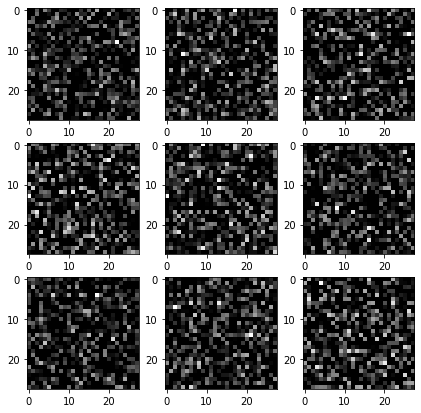

Epoch:0, Step:0, D-Loss:0.754, D-Acc:27.000, G-Loss:0.814
Epoch:0, Step:50, D-Loss:0.008, D-Acc:100.000, G-Loss:5.558
Epoch:0, Step:100, D-Loss:0.002, D-Acc:100.000, G-Loss:7.063
Epoch:0, Step:150, D-Loss:0.001, D-Acc:100.000, G-Loss:8.078
Epoch:0, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:8.805
Epoch:0, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:9.356
Epoch:0, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:9.809
Epoch:0, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:10.200
Epoch:0, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:10.541
Epoch:0, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:10.818
Epoch:1, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:11.078
Epoch:1, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:11.285
Epoch:1, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:11.516
Epoch:1, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:11.710
Epoch:1, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:11.826
Epoch:1, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:12.006
Epoch:1, Step:300, D-L

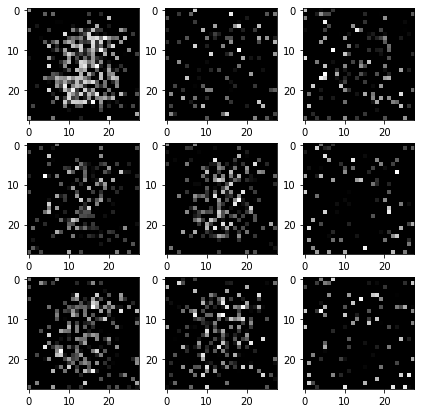

Epoch:5, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:15.327
Epoch:5, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:15.325
Epoch:5, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:15.408
Epoch:5, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:15.415
Epoch:5, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:15.328
Epoch:5, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:15.580
Epoch:5, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:15.616
Epoch:5, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:15.704
Epoch:5, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:15.756
Epoch:5, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:15.730
Epoch:6, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:15.905
Epoch:6, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:15.858
Epoch:6, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:15.945
Epoch:6, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:15.919
Epoch:6, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:15.989
Epoch:6, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:16.078
Epoch:6, Step:

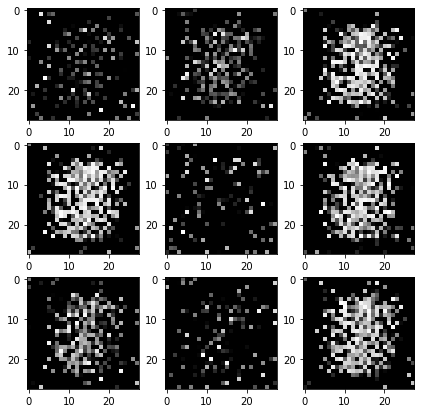

Epoch:10, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:17.440
Epoch:10, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:17.196
Epoch:10, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:17.259
Epoch:10, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:17.507
Epoch:10, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:17.426
Epoch:10, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:17.391
Epoch:10, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:17.547
Epoch:10, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:17.627
Epoch:10, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:17.686
Epoch:10, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:17.756
Epoch:11, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:17.797
Epoch:11, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:17.827
Epoch:11, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:17.657
Epoch:11, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:17.714
Epoch:11, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:17.704
Epoch:11, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:17.86

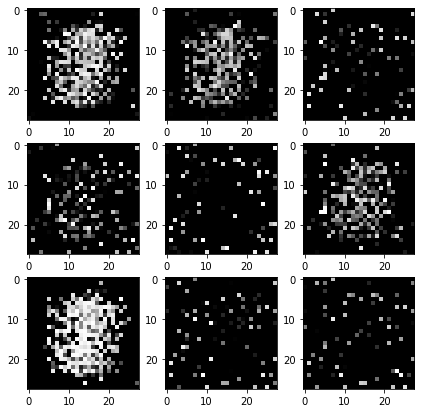

Epoch:15, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:18.900
Epoch:15, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:18.942
Epoch:15, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:18.933
Epoch:15, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:19.077
Epoch:15, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:19.054
Epoch:15, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:18.949
Epoch:15, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:18.998
Epoch:15, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:19.056
Epoch:15, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:19.107
Epoch:15, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:19.182
Epoch:16, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:19.088
Epoch:16, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:18.989
Epoch:16, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:19.224
Epoch:16, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:19.268
Epoch:16, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:19.180
Epoch:16, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:19.30

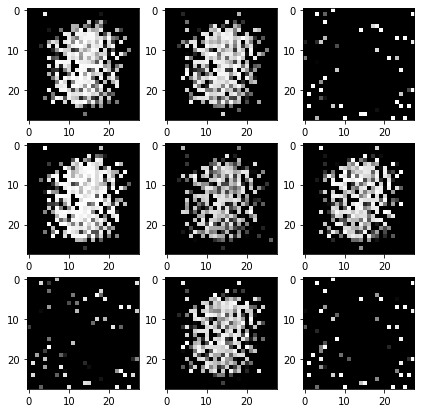

Epoch:20, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:20.000
Epoch:20, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:20.022
Epoch:20, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:19.939
Epoch:20, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:20.119
Epoch:20, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:20.141
Epoch:20, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:20.117
Epoch:20, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:20.278
Epoch:20, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:20.147
Epoch:20, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:20.247
Epoch:20, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:20.198
Epoch:21, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:20.274
Epoch:21, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:20.188
Epoch:21, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:20.293
Epoch:21, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:20.282
Epoch:21, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:20.264
Epoch:21, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:20.43

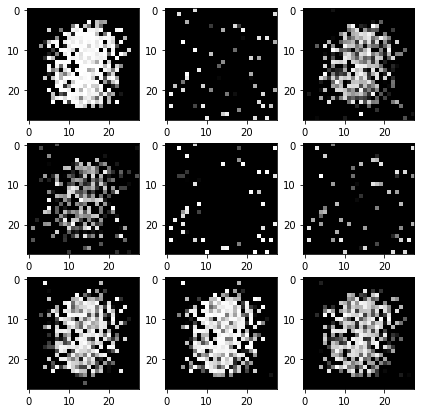

Epoch:25, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:21.026
Epoch:25, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:21.053
Epoch:25, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.128
Epoch:25, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:21.081
Epoch:25, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:21.166
Epoch:25, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:21.070
Epoch:25, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:21.156
Epoch:25, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:21.157
Epoch:25, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:21.132
Epoch:25, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:21.138
Epoch:26, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:21.153
Epoch:26, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:21.170
Epoch:26, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.344
Epoch:26, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:21.173
Epoch:26, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:21.143
Epoch:26, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:21.18

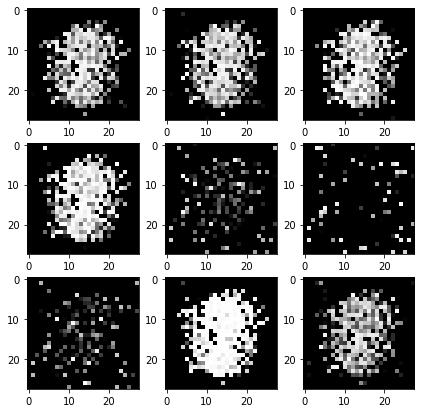

Epoch:30, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:21.860
Epoch:30, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:21.780
Epoch:30, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.745
Epoch:30, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:21.758
Epoch:30, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:21.765
Epoch:30, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:21.836
Epoch:30, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:21.790
Epoch:30, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:21.908
Epoch:30, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:21.859
Epoch:30, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:21.845
Epoch:31, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.010
Epoch:31, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:21.871
Epoch:31, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:21.981
Epoch:31, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:21.936
Epoch:31, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.051
Epoch:31, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:21.82

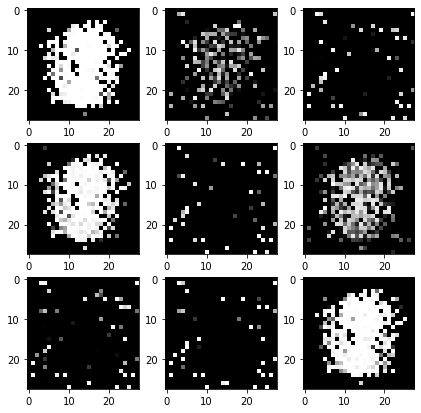

Epoch:35, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.381
Epoch:35, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.466
Epoch:35, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.463
Epoch:35, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.524
Epoch:35, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.386
Epoch:35, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.539
Epoch:35, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:22.471
Epoch:35, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:22.463
Epoch:35, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:22.581
Epoch:35, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:22.500
Epoch:36, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.337
Epoch:36, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.438
Epoch:36, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.531
Epoch:36, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.349
Epoch:36, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.499
Epoch:36, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.65

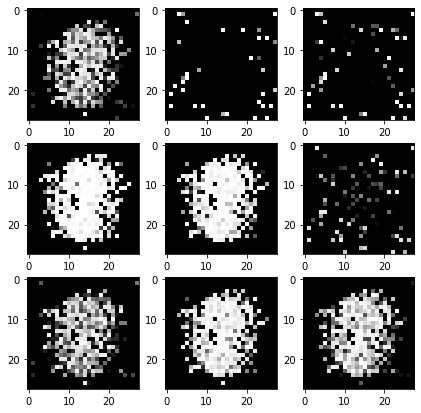

Epoch:40, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:22.782
Epoch:40, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:22.778
Epoch:40, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:22.985
Epoch:40, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:22.894
Epoch:40, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.774
Epoch:40, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:22.854
Epoch:40, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:22.865
Epoch:40, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:22.869
Epoch:40, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:22.764
Epoch:40, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:22.857
Epoch:41, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.027
Epoch:41, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.146
Epoch:41, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.075
Epoch:41, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.006
Epoch:41, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:22.890
Epoch:41, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.17

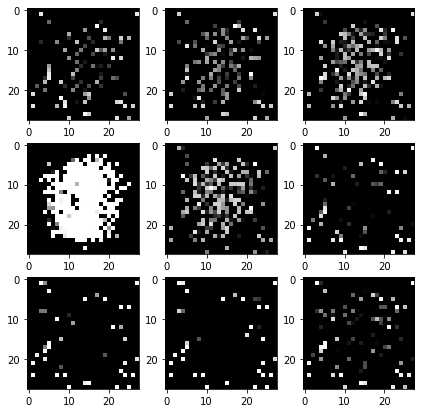

Epoch:45, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.296
Epoch:45, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.243
Epoch:45, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.309
Epoch:45, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.393
Epoch:45, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.296
Epoch:45, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.392
Epoch:45, Step:300, D-Loss:0.000, D-Acc:100.000, G-Loss:23.466
Epoch:45, Step:350, D-Loss:0.000, D-Acc:100.000, G-Loss:23.264
Epoch:45, Step:400, D-Loss:0.000, D-Acc:100.000, G-Loss:23.382
Epoch:45, Step:450, D-Loss:0.000, D-Acc:100.000, G-Loss:23.465
Epoch:46, Step:0, D-Loss:0.000, D-Acc:100.000, G-Loss:23.385
Epoch:46, Step:50, D-Loss:0.000, D-Acc:100.000, G-Loss:23.326
Epoch:46, Step:100, D-Loss:0.000, D-Acc:100.000, G-Loss:23.337
Epoch:46, Step:150, D-Loss:0.000, D-Acc:100.000, G-Loss:23.431
Epoch:46, Step:200, D-Loss:0.000, D-Acc:100.000, G-Loss:23.128
Epoch:46, Step:250, D-Loss:0.000, D-Acc:100.000, G-Loss:23.25

In [11]:
epochs = 50
batch_size = 100
steps = 500
noise_size = 50

losses_d = []
losses_g = []

for i in range(0, epochs):
    if (i%5 == 0):
        show_generator_results(generator_network)
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = gan_model.train_on_batch(gan_input, gan_output)
        
        losses_d.append(loss_d[0])
        losses_g.append(loss_g)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

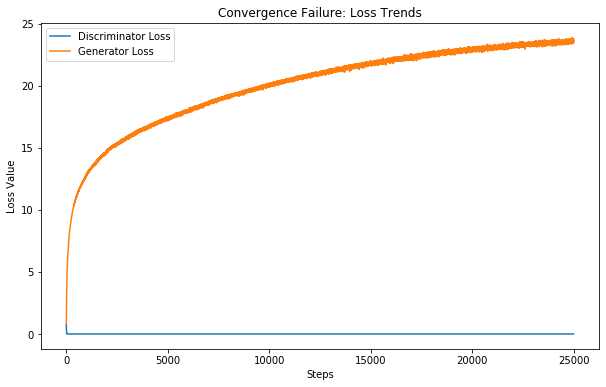

In [12]:
steps = [i for i in range(len(losses_d))]
plt.figure(figsize=(10, 6))
plt.plot(losses_d)
plt.plot(losses_g)
plt.xlabel('Steps')
plt.ylabel('Loss Value')
plt.title("Convergence Failure: Loss Trends")
plt.legend(['Discriminator Loss', 'Generator Loss'])
plt.show()